In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [18]:
lats = np.linspace(90, -90, 721)

In [19]:
trmm_data = xr.open_mfdataset('raw_data/*.nc4')

In [20]:
trmm_data_regrid = trmm_data.mean('lon').interp(lat=lats)

In [21]:
trmm_data_regrid = trmm_data_regrid.compute()

In [22]:
trmm_data_regrid

<xarray.Dataset>
Dimensions:        (time: 256, lat: 721)
Coordinates:
  * time           (time) object 2000-06-01 00:00:00 ... 2021-09-01 00:00:00
  * lat            (lat) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    precipitation  (time, lat) float64 nan nan nan nan nan ... nan nan nan nan

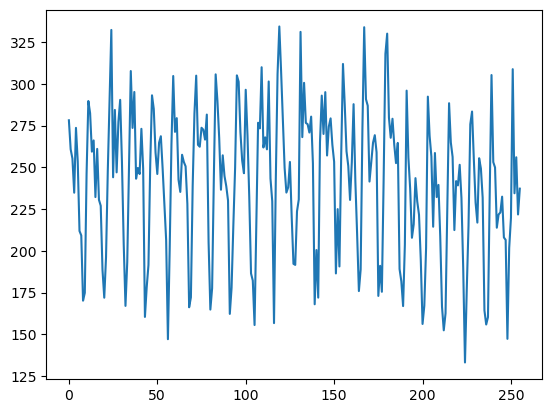

In [24]:
plt.plot(range(256), 1000 * trmm_data_regrid.precipitation.sel(lat=slice(10, 0)).mean('lat'))

plt.show()

In [25]:
#trmm_data_regrid.to_netcdf('trmm_precip_data.nc')